In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

influencers = pd.read_csv("influencers_data.csv")
influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [4]:
#dropping the column country because of missing values
#the column country is insignificant to the clustering that 
#we're about to perform
influencers = influencers.drop("country", axis=1)

In [5]:
influencers.columns

Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes'],
      dtype='object')

In [6]:
influencers

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b
...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b


In [11]:
#converting posts

posts = list(influencers['posts'])
temp_posts = list()

for i in posts:
    if 'k' in i:
        new_i = 1000 * float(i.replace('k', ''))
        temp_posts.append(new_i)
    else:
        temp_posts.append(float(i))

influencers['posts'] = temp_posts

TypeError: argument of type 'float' is not iterable

In [14]:
#converting followers

original = list(influencers['followers'])
temp = list()

for i in original:
    if 'k' in i:
        new_i = 1000 * float(i.replace('k', ''))
        temp.append(new_i)
    elif 'm' in i:
        new_i = 1000000 * float(i.replace('m', ''))
        temp.append(new_i)
    else:
        temp.append(float(i))

influencers['followers'] = temp

In [17]:
#converting avg_like

original = list(influencers['avg_likes'])
temp = list()

for i in original:
    if 'k' in i:
        new_i = 1000 * float(i.replace('k', ''))
        temp.append(new_i)
    elif 'm' in i:
        new_i = 1000000 * float(i.replace('m', ''))
        temp.append(new_i)
    else:
        temp.append(float(i))

influencers['avg_likes'] = temp

In [18]:
influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    200 non-null    object 
 7   new_post_avg_like  200 non-null    object 
 8   total_likes        200 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 14.2+ KB


In [19]:
#converting new_post_avg_like

original = list(influencers['new_post_avg_like'])
temp = list()

for i in original:
    if 'k' in i:
        new_i = 1000 * float(i.replace('k', ''))
        temp.append(new_i)
    elif 'm' in i:
        new_i = 1000000 * float(i.replace('m', ''))
        temp.append(new_i)
    else:
        temp.append(float(i))

influencers['new_post_avg_like'] = temp

In [20]:
#converting total_likes

original = list(influencers['total_likes'])
temp = list()

for i in original:
    if 'k' in i:
        new_i = 1000 * float(i.replace('k', ''))
        temp.append(new_i)
    elif 'm' in i:
        new_i = 1000000 * float(i.replace('m', ''))
        temp.append(new_i)
    elif 'b' in i:
        new_i = 1000000000 * float(i.replace('b', ''))
        temp.append(new_i)
    else:
        temp.append(float(i))

influencers['total_likes'] = temp

In [21]:
influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    200 non-null    object 
 7   new_post_avg_like  200 non-null    float64
 8   total_likes        200 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 14.2+ KB


In [22]:
influencers

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39%,6500000.0,2.900000e+10
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62%,5900000.0,5.740000e+10
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24%,4400000.0,6.000000e+09
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97%,3300000.0,1.150000e+10
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20%,665300.0,1.250000e+10
...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40%,464700.0,1.400000e+09
196,197,nancyajram,81,3800.0,33200000.0,390400.0,0.64%,208000.0,1.500000e+09
197,198,luansantana,79,770.0,33200000.0,193300.0,0.26%,82600.0,1.492000e+08
198,199,nickjonas,78,2300.0,33000000.0,719600.0,1.42%,467700.0,1.700000e+09


In [27]:
new_influencers = influencers.drop('channel_info', axis=1)
new_influencers = new_influencers.drop('60_day_eng_rate', axis=1)

In [28]:
new_influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   influence_score    200 non-null    int64  
 2   posts              200 non-null    float64
 3   followers          200 non-null    float64
 4   avg_likes          200 non-null    float64
 5   new_post_avg_like  200 non-null    float64
 6   total_likes        200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB


C:\Users\shmll\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shmll\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shmll\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shmll\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

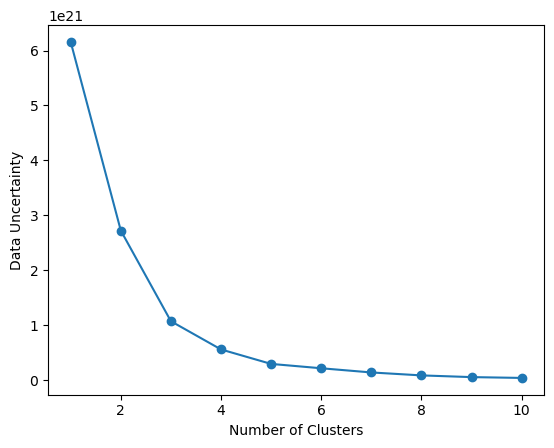

In [32]:
from sklearn.cluster import KMeans

clustercol = []

for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit_predict(new_influencers)
    clustercol.append(km.inertia_)

fig, ax = plt.subplots()
ax.plot(range(1, 11), clustercol, '-o')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Data Uncertainty')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=4, random_state=40)
kmeans.fit(new_influencers)
new_influencers['clusters'] = kmeans.predict(new_influencers)
new_influencers

C:\Users\shmll\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shmll\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,rank,influence_score,posts,followers,avg_likes,new_post_avg_like,total_likes,clusters
0,1,92,3300.0,475800000.0,8700000.0,6500000.0,2.900000e+10,3
1,2,91,6900.0,366200000.0,8300000.0,5900000.0,5.740000e+10,1
2,3,90,890.0,357300000.0,6800000.0,4400000.0,6.000000e+09,0
3,4,93,1800.0,342700000.0,6200000.0,3300000.0,1.150000e+10,0
4,5,91,6800.0,334100000.0,1900000.0,665300.0,1.250000e+10,3
...,...,...,...,...,...,...,...,...
195,196,71,2300.0,33200000.0,623800.0,464700.0,1.400000e+09,2
196,197,81,3800.0,33200000.0,390400.0,208000.0,1.500000e+09,2
197,198,79,770.0,33200000.0,193300.0,82600.0,1.492000e+08,2
198,199,78,2300.0,33000000.0,719600.0,467700.0,1.700000e+09,2


In [35]:
cluster_means = new_influencers.groupby('clusters').mean()
cluster_means

,rank,influence_score,posts,followers,avg_likes,new_post_avg_like,total_likes
clusters,,,,,,,
0,53.925000,83.850000,4900.250000,1.103725e+08,2.413960e+06,1.836538e+06,6.555000e+09
1,2.000000,91.000000,6900.000000,3.662000e+08,8.300000e+06,5.900000e+06,5.740000e+10
2,118.840000,80.713333,2993.066667,5.543200e+07,1.457082e+06,9.273313e+05,1.681483e+09
3,12.777778,90.222222,5344.444444,2.651111e+08,3.777778e+06,2.573922e+06,1.775556e+10


In [46]:
k = 7

correlation = new_influencers.corr()
cols = correlation.nlargest(k, 'total_likes')['total_likes'].index
print(cols)

Index(['total_likes', 'followers', 'avg_likes', 'new_post_avg_like',
       'influence_score', 'posts', 'clusters'],
      dtype='object')


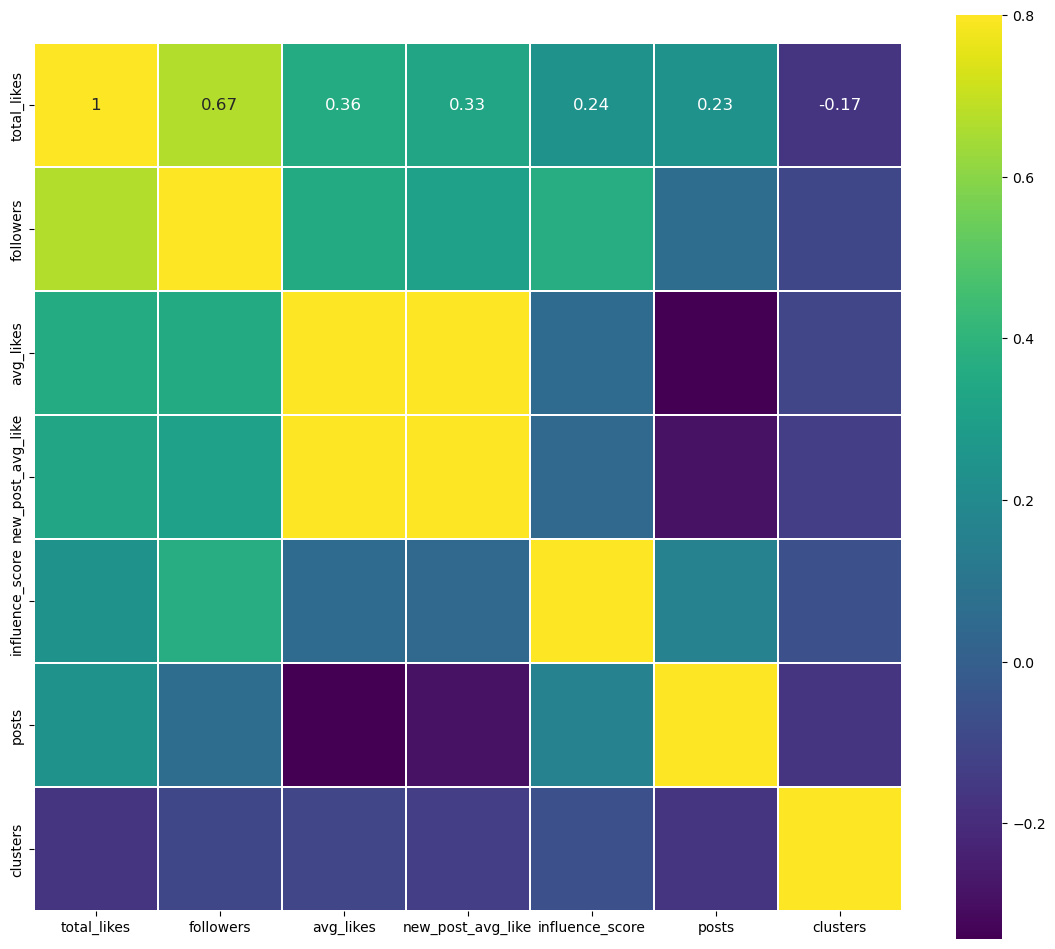

In [48]:
cm = np.corrcoef(new_influencers[cols].values.T)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis', xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)
plt.show()